In [1]:
import utils
import pandas as pd
import numpy as np

alerts, jams = utils.load_data()

In [2]:
alerts.shape

(8567, 16)

In [3]:
alerts.head()

,country,city,reportRating,reportByMunicipalityUser,confidence,reliability,type,uuid,roadType,magvar,subtype,street,location,pubMillis,endreport,reportDescription
0,CI,Antofagasta,1,false,5,10,HAZARD,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,6,17,HAZARD_ON_ROAD_CONSTRUCTION,Av. República de Croacia,"{'x': -70.412429, 'y': -23.676846}",1724417637000,1724425125000,NaN
1,CI,Antofagasta,0,false,0,5,JAM,1d8df954-e380-4327-8015-f4fbadf74f2d,6,4,JAM_HEAVY_TRAFFIC,Av. Edmundo Pérez Zujovic,"{'x': -70.392283, 'y': -23.617475}",1724423878000,1724425125000,NaN
2,CI,Antofagasta,0,false,0,5,JAM,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,1,359,,Pasaje El Volcán,"{'x': -70.385619, 'y': -23.573323}",1724425406000,1724425125000,NaN
3,CI,Antofagasta,1,false,0,5,JAM,53b6ff5f-d078-421d-9f78-03e534d78989,2,1,,Azapa,"{'x': -70.384986, 'y': -23.616328}",1724425622000,1724425125000,NaN
4,CI,Antofagasta,2,false,0,5,ACCIDENT,e87552f7-4572-4096-9fdd-9400ad90e7f8,2,281,,Irarrázaval,"{'x': -70.385121, 'y': -23.603942}",1724425939000,1724425125000,NaN


In [4]:
alerts_cleaned = utils.extract_event(alerts, ["JAM", "ACCIDENT"], extra_col=['type']).drop('uuid', axis=1)
alerts_cleaned['day'] = alerts_cleaned.inicio.dt.day
alerts_cleaned['month'] = alerts_cleaned.inicio.dt.month
alerts_cleaned['year'] = alerts_cleaned.inicio.dt.year
alerts_cleaned['minute'] = alerts_cleaned.inicio.dt.minute
alerts_cleaned = alerts_cleaned.drop(['inicio', 'fin', 'geometry'], axis=1)

alerts_cleaned.head()

,street,x,y,type,hour,week_day,day_type,day,month,year,minute
1,Av. Edmundo Pérez Zujovic,-70.392283,-23.617475,JAM,10,4,s,23,8,2024,37
2,Pasaje El Volcán,-70.385619,-23.573323,JAM,11,4,s,23,8,2024,3
3,Azapa,-70.384986,-23.616328,JAM,11,4,s,23,8,2024,7
4,Irarrázaval,-70.385121,-23.603942,ACCIDENT,11,4,s,23,8,2024,12
5,Coquimbo,-70.399240,-23.657366,JAM,11,4,s,23,8,2024,40


In [5]:
alerts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6136 entries, 1 to 8563
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   street    6111 non-null   object 
 1   x         6136 non-null   float64
 2   y         6136 non-null   float64
 3   type      6136 non-null   object 
 4   hour      6136 non-null   int32  
 5   week_day  6136 non-null   int32  
 6   day_type  6136 non-null   object 
 7   day       6136 non-null   int32  
 8   month     6136 non-null   int32  
 9   year      6136 non-null   int32  
 10  minute    6136 non-null   int32  
dtypes: float64(2), int32(6), object(3)
memory usage: 431.4+ KB


In [6]:
print(f"{len(alerts_cleaned[alerts_cleaned['street'].isna()]) / len(alerts_cleaned['street']) * 100:.2f}% de lo datos es nulos en 'street'")

0.41% de lo datos es nulos en 'street'


In [7]:
alerts_cleaned["street"].value_counts()[:10]

street
Av. Edmundo Pérez Zujovic    1537
Av. Pedro Aguirre Cerda       548
Av. Grecia                    402
Av. Iquique                   304
Av. Antonio Rendic            275
Av. Balmaceda                 169
Nicolás Tirado                154
Av. Argentina                 124
Av. Óscar Bonilla             120
Av. Salvador Allende           83
Name: count, dtype: int64

In [8]:
alerts_cleaned["street"].value_counts().index[:10]

Index(['Av. Edmundo Pérez Zujovic', 'Av. Pedro Aguirre Cerda', 'Av. Grecia',
       'Av. Iquique', 'Av. Antonio Rendic', 'Av. Balmaceda', 'Nicolás Tirado',
       'Av. Argentina', 'Av. Óscar Bonilla', 'Av. Salvador Allende'],
      dtype='object', name='street')

In [9]:
# Eliminamos valores nulos y filtro por calle

streets = alerts_cleaned["street"].value_counts().index[:10].to_numpy()

alerts_cleaned = alerts_cleaned[alerts_cleaned['street'].apply(lambda x: x in streets)]
alerts_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 1 to 8551
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   street    3716 non-null   object 
 1   x         3716 non-null   float64
 2   y         3716 non-null   float64
 3   type      3716 non-null   object 
 4   hour      3716 non-null   int32  
 5   week_day  3716 non-null   int32  
 6   day_type  3716 non-null   object 
 7   day       3716 non-null   int32  
 8   month     3716 non-null   int32  
 9   year      3716 non-null   int32  
 10  minute    3716 non-null   int32  
dtypes: float64(2), int32(6), object(3)
memory usage: 261.3+ KB


In [10]:
alerts_cleaned.to_csv('alerts.csv', sep=',', decimal='.', encoding='utf-8', index=False)

In [11]:
cat = ["street", "type", "day_type"]
num = list(alerts_cleaned.drop(cat, axis=1).columns)

## Balanceo de eventos (creación de no-eventos ficticios)

In [12]:
# Balanceo de eventos y creación de no eventos

events = alerts_cleaned.copy()
events['happen'] = 1

q_events = len(events)

street = events['street']
x = events['x']
y = events['y']
type = np.random.choice(["ACCIDENT", "JAM"], q_events)
hour = np.random.randint(events.hour.min(), events.hour.max(), q_events)
minute = np.random.randint(events.minute.min(), events.minute.max(), q_events)
week_day = np.random.randint(events.week_day.min(), events.week_day.max(), q_events)
day_type = np.random.choice(["s", "f"], q_events)
day = np.random.randint(events.day.min(), events.day.max() + 1, q_events)
month = np.random.randint(events.month.min(), events.month.max() + 1, q_events)
year = np.random.choice(events.year.unique(), q_events)


no_events = pd.DataFrame({
    "street": street,
    "x": x,
    "y": y,
    "type": type,
    "hour": hour,
    "minute": minute,
    "week_day": week_day,
    "day_type": day_type,
    "day": day,
    "month": month,
    "year": year,
    "happen": 0
})

no_events

,street,x,y,type,hour,minute,week_day,day_type,day,month,year,happen
1,Av. Edmundo Pérez Zujovic,-70.392283,-23.617475,JAM,10,2,2,f,20,9,2024,0
7,Av. Grecia,-70.402438,-23.650212,JAM,9,27,1,s,20,9,2024,0
8,Av. Grecia,-70.402429,-23.649991,ACCIDENT,18,18,3,f,7,10,2024,0
9,Av. Balmaceda,-70.400096,-23.645631,JAM,5,20,3,s,6,10,2024,0
11,Av. Balmaceda,-70.401486,-23.647052,JAM,3,9,5,f,26,10,2024,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8543,Av. Pedro Aguirre Cerda,-70.388947,-23.616659,JAM,8,55,1,s,26,10,2024,0
8544,Av. Grecia,-70.402335,-23.647936,JAM,14,21,0,f,17,8,2024,0
8545,Av. Pedro Aguirre Cerda,-70.391009,-23.576996,JAM,7,18,5,f,6,9,2024,0
8548,Av. Edmundo Pérez Zujovic,-70.395761,-23.637618,JAM,14,28,1,f,10,9,2024,0


In [13]:
total_events = pd.concat([events, no_events], axis=0)
total_events['happen'].value_counts()

happen
1    3716
0    3716
Name: count, dtype: int64

## Ocurrencia de evento

In [14]:
# Se elimina mes y año porque no hay muestras suficientes

X_happen = total_events.drop(['happen', "type", "x", "y", "street", "month", "year"], axis=1)
y_happen = total_events['happen']

In [15]:
dt = {"f": 0, "s": 1}

X_happen["day_type"] = X_happen["day_type"].map(dt)


In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train_happen, X_test_happen, y_train_happen, y_test_happen = train_test_split(X_happen, y_happen, test_size=0.2, random_state=42)

rfc_happen = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10, min_samples_split=5, n_estimators=100)
rfc_happen.fit(X_train_happen, y_train_happen)

y_predict_happen = rfc_happen.predict(X_test_happen)

In [17]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

confusion_matrix(y_test_happen, y_predict_happen)

array([[598, 134],
       [ 29, 726]])

In [18]:
recall = recall_score(y_test_happen, y_predict_happen)
precision = precision_score(y_test_happen, y_predict_happen)
f1 = f1_score(y_test_happen, y_predict_happen)

recall, precision, f1

(np.float64(0.9615894039735099),
 np.float64(0.8441860465116279),
 np.float64(0.8990712074303405))

In [19]:
# Un dato de prueba

test = {
    "hour": [7],
    "week_day": [4],
    "day_type": [1],
    "day": [11],
    "minute": [20]
}

rfc_happen.predict_proba(pd.DataFrame(test)), rfc_happen.predict(pd.DataFrame(test))


(array([[0.15259839, 0.84740161]]), array([1]))

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc_happen, X_happen, y_happen, cv=10)

In [21]:
scores

array([0.64516129, 0.70295699, 0.71601615, 0.89905787, 0.60834455,
       0.48048452, 0.59892328, 0.67160162, 0.69717362, 0.77523553])

## Tipo de evento

In [22]:
X_type = events.drop(["happen", "month", "year", "x", "y", "type", "street"], axis=1)
y_type = events["type"]

In [23]:
X_type["day_type"] = X_type["day_type"].map(dt)

In [24]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le_type = LabelEncoder()
y_type = le_type.fit_transform(y_type)



In [25]:
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

In [26]:
rfc_type = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, class_weight="balanced", min_samples_split=10, max_samples=20)
rfc_type.fit(X_train_type, y_train_type)

y_predict_type = rfc_type.predict(X_test_type)

In [27]:
scores = cross_val_score(rfc_type, X_type, y_type, cv=10)
scores

array([0.88978495, 0.88978495, 0.88978495, 0.88978495, 0.88978495,
       0.88978495, 0.89218329, 0.89218329, 0.89218329, 0.88948787])

In [28]:
confusion_matrix(y_test_type, y_predict_type)

array([[  0,  76],
       [  0, 668]])

In [29]:
recall = recall_score(y_test_type, y_predict_type)
precision = precision_score(y_test_type, y_predict_type)
f1 = f1_score(y_test_type, y_predict_type)

recall, precision, f1

(np.float64(1.0),
 np.float64(0.8978494623655914),
 np.float64(0.9461756373937678))

In [30]:
events['type'].value_counts()

type
JAM         3309
ACCIDENT     407
Name: count, dtype: int64

## Calle de evento

In [31]:
X_street = events.drop(["happen", "month", "year", "x", "y", "street"], axis=1)
y_street = events['street']

In [32]:
le_street = LabelEncoder()

for c in cat:
    if c in X_street.columns:
        X_street[c] = le_street.fit_transform(X_street[c])

y_street = le_street.fit_transform(y_street)

In [33]:
sm_street = SMOTE(random_state=42)

X_street_resampled, y_street_resampled = sm_street.fit_resample(X_street, y_street)

X_train_street, X_test_street, y_train_street, y_test_street = train_test_split(X_street_resampled, y_street_resampled, test_size=0.2, random_state=42)
rfc_street = RandomForestClassifier(random_state=42, n_estimators=100, class_weight="balanced")
rfc_street.fit(X_train_street, y_train_street)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
y_predict_street = rfc_street.predict(X_test_street)

In [35]:
scores = cross_val_score(rfc_street, X_street, y_street, cv=10)
scores

array([0.33064516, 0.10215054, 0.06451613, 0.10483871, 0.11827957,
       0.10483871, 0.14016173, 0.21024259, 0.18598383, 0.22102426])

In [36]:
confusion_matrix(y_test_street, y_predict_street)

array([[226,   9,   5,  17,  20,  16,   8,   7,   3,  11],
       [  9, 254,   7,  13,   7,   4,   2,   4,   7,   6],
       [  8,   2, 236,  16,  12,   7,   8,   6,   6,   3],
       [ 22,   7,  17, 111,  23,  25,  41,  16,  11,  13],
       [ 11,  18,  21,  29, 180,  13,  10,   3,  20,  12],
       [ 16,   7,  10,  15,  16, 221,  11,   9,  11,   9],
       [ 14,  13,  11,  18,  16,   6, 194,   5,   4,  12],
       [  4,   5,   3,   3,   4,   8,   2, 259,   5,   1],
       [  1,   8,   5,   5,  11,   5,   3,   4, 269,   4],
       [  8,   2,   3,   9,   5,   6,   7,   2,   5, 258]])

In [37]:
recall = recall_score(y_test_street, y_predict_street, average='weighted')
precision = precision_score(y_test_street, y_predict_street, average='weighted')
f1 = f1_score(y_test_street, y_predict_street, average='weighted')

recall, precision, f1

(np.float64(0.7182823682498374),
 np.float64(0.7111433898904923),
 np.float64(0.7138020099910789))

In [38]:
# Un dato de prueba

happen = ["No ocurre", "Ocurre"]

test = {
    "hour": [7],
    "week_day": [4],
    "day_type": [1],
    "day": [10],
    "minute": [20]
}

rfc_happen.predict_proba(pd.DataFrame(test)), happen[rfc_happen.predict(pd.DataFrame(test))[0]]


(array([[0.16955395, 0.83044605]]), 'Ocurre')

In [39]:
rfc_type.predict_proba(pd.DataFrame(test)), le_type.classes_[rfc_type.predict(pd.DataFrame(test))][0]

(array([[0.26267593, 0.73732407]]), 'JAM')

In [40]:
test_street = pd.concat([pd.DataFrame({"type": [rfc_type.predict(pd.DataFrame(test))[0]]}), pd.DataFrame(test)], axis = 1)

In [41]:
rfc_street.predict_proba(pd.DataFrame(test_street)), le_street.classes_[rfc_street.predict(pd.DataFrame(test_street))[0]]

(array([[0.02      , 0.04      , 0.02      , 0.57747996, 0.        ,
         0.00848325, 0.11      , 0.01      , 0.21      , 0.00403679]]),
 'Av. Edmundo Pérez Zujovic')

Ocurrirá un evento tipo JAM en Av. Edmundo Pérez Zujovic el 10 de Octubre a las 7:20.

In [42]:
# Distribución de probabilidad de evento durante el día

prob_pred = []

for h in range(0, 24):
    for m in range(0, 60):
        pred = rfc_happen.predict_proba(pd.DataFrame({
                "hour": [h],
                "week_day": [4],
                "day_type": [1],
                "day": [8],
                "minute": [m]
            }))
        prob_pred.append(pred[0][1])

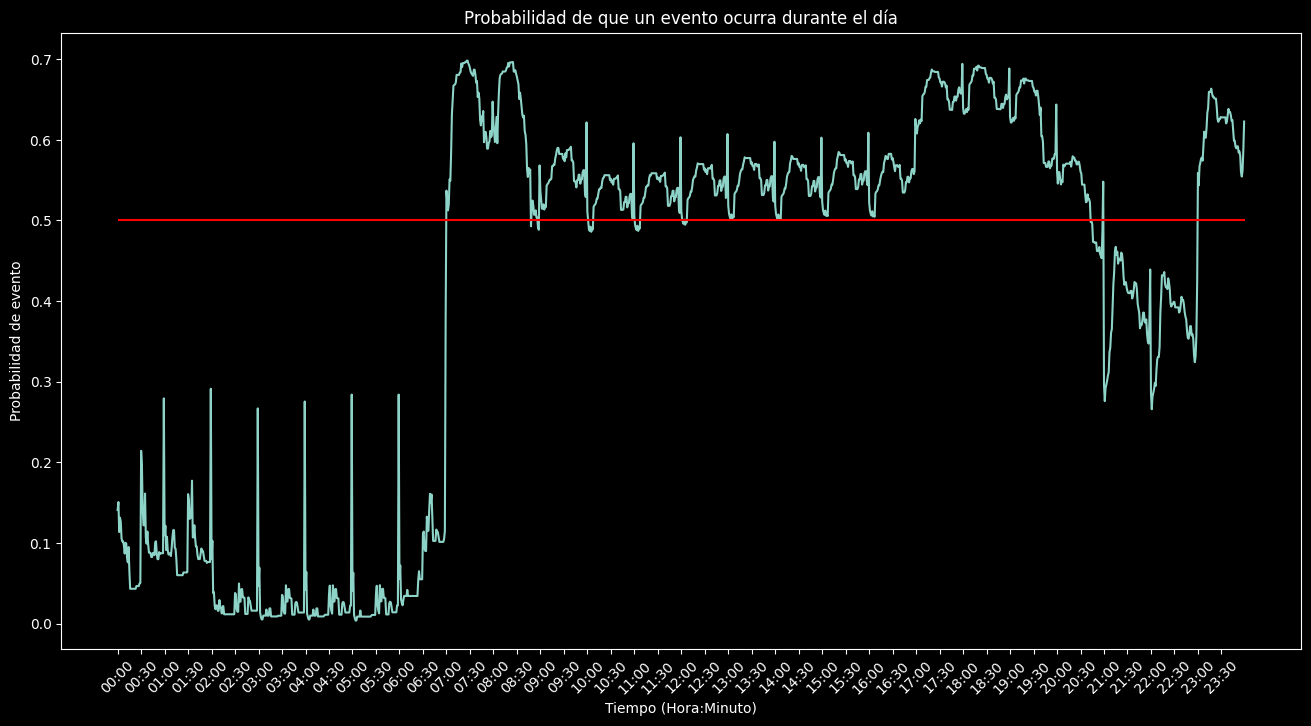

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Crear la lista de etiquetas de horas y minutos cada media hora
xticks_labels = [f"{h:02}:{m:02}" for h in range(24) for m in [0, 30]]

# Crear los índices para las etiquetas cada media hora (cada 30 minutos son 2 puntos por hora)
xticks_positions = np.arange(0, len(prob_pred), 30)

plt.plot(prob_pred)
plt.hlines(0.5, 0, len(prob_pred), colors="r")
plt.xticks(xticks_positions, xticks_labels, rotation=45)

# Mostrar el gráfico
plt.xlabel("Tiempo (Hora:Minuto)")
plt.ylabel("Probabilidad de evento")
plt.title("Probabilidad de que un evento ocurra durante el día")
plt.show()